## Final Project Submission


### Leah Pilossoph
### November - Full-Time
### Friday, December 21st, 2018; 5:30pm EST 
### Instructor: Rafael Carrasco 
### www....


# Step 1: OBTAINING THE DATA!

In [568]:
import numpy as np
import pandas as pd
import statsmodels as sm
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

from itertools import combinations
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [569]:
# importing and visualizing the data first
df = pd.read_csv("kc_house_data.csv")
# looking at the data set, are there many null values? what are the data types? etc.
print(df.info())
df.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB
None


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


## Step 1a. A Closer Look At the Data:

#### After inspecting waterfront data (assuming 1 = waterfront property, 0 = not a waterfront property since waterfront properties are less common in general) it makes the most sense to change the null values to 0 (not waterfront) 

#### After examining year renovated column; it appears that a value of 0 means that the property has not been renovated (this is an assumption).

#### After examining the basement square footage column, I noticed there were '?' values in the data set as placeholders.

#### After examining the "has been viewed" column. Assuming that the corresponding value indicates the number of times the property has been viewed

# Step 2: SCRUB A DUB DUB THE DATA!

In [570]:
# changing all the null values in the waterfront column to 0, meaning not a waterfront property since this is most likely the case.
df.waterfront = df['waterfront'].fillna(0)
# changing all null values to 0 assuming that no value entered in the data means that the property has not been renovated
df.yr_renovated = df['yr_renovated'].fillna(0)
# Changing the type from object to integer for square footage of basement
df['sqft_basement'] = pd.to_numeric(df.sqft_basement, errors='coerce')
# dropping all rows with null value for basement square footage, 
# since there are very few with null values compared to the whole dataset
df.dropna(inplace=True)
# With the above assumption, changing all the null values to 0, indicating that a null value means that the property has not been viewed.
df.view = df['view'].fillna(0)

## Now, a quick peak at the scrubbed data:

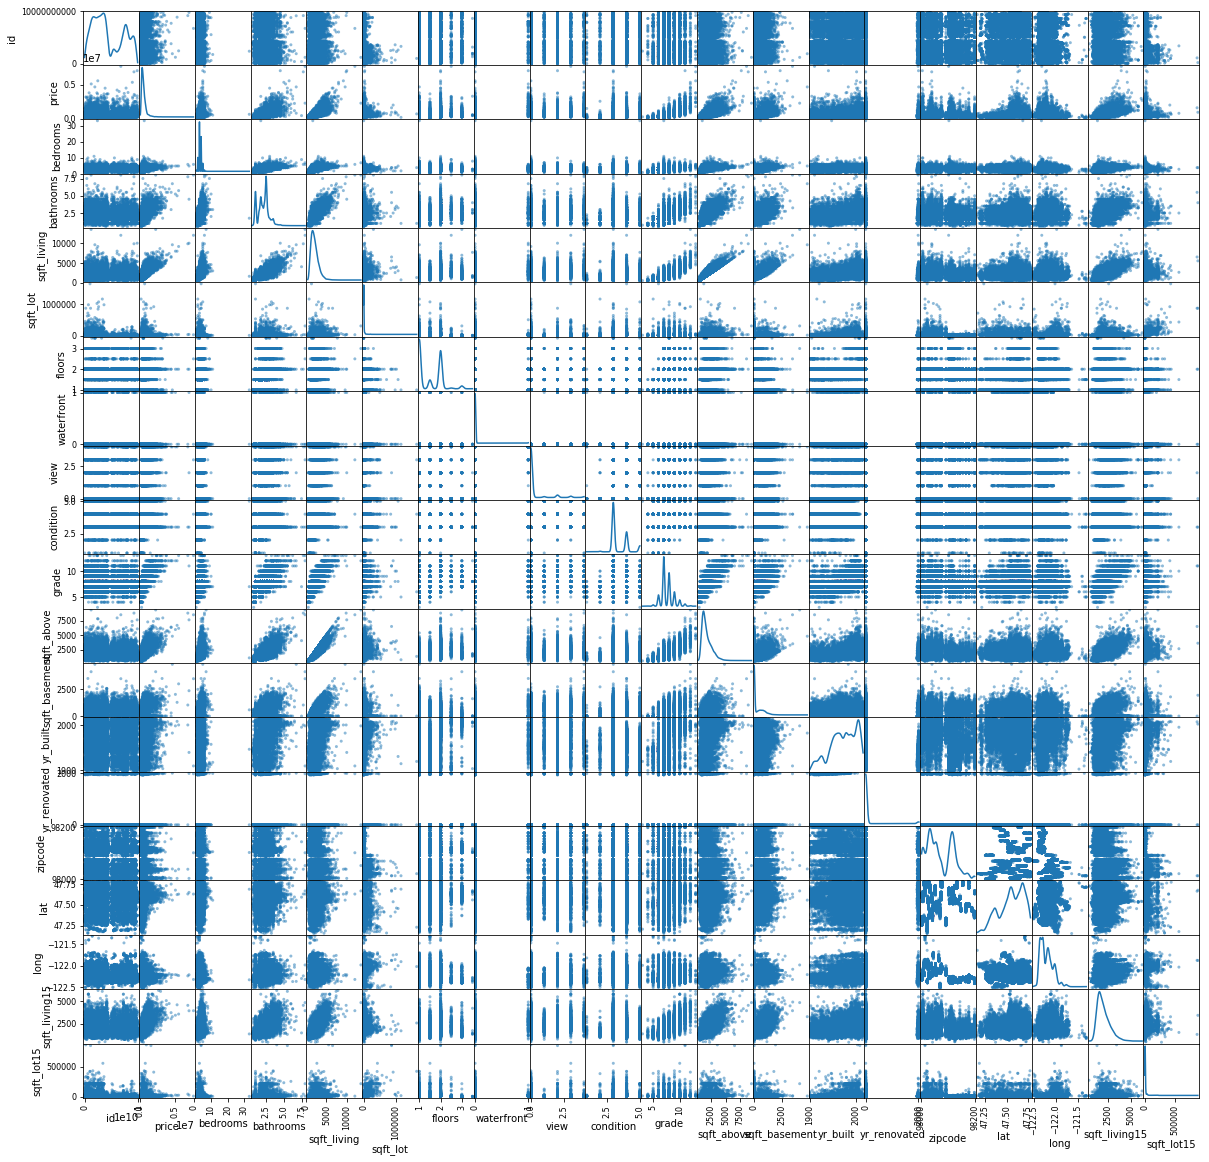

In [558]:
# plotting the data to get an overall picture of the relationships, if they exist.
pd.scatter_matrix(df, alpha=0.5, figsize=(20, 20), diagonal='kde')
plt.show()

#### It appears that there are some positive linear relationships between price and bathrooms, sqft_living, grade, sqft_above, and sqft_living15 when looking at these plots with the naked eye

## Step 2a. Check for Multicolinearity:

In [571]:
orig_df = df
df_features = df.drop(['price'], axis=1)
df_features = df_features.drop(['date'], axis=1)
df_features = df_features.drop(['id'], axis=1)

In [572]:
df_features.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,1.000000,0.513694,0.577696,0.032531,0.178518,-0.001578,0.080379,0.025652,0.356418,0.478967,0.301987,0.156820,0.018345,-0.152539,-0.009939,0.131398,0.391936,0.030779
bathrooms,0.513694,1.000000,0.754793,0.088451,0.503796,0.062055,0.187249,-0.128167,0.665992,0.685959,0.281813,0.508866,0.047738,-0.204016,0.025243,0.224660,0.569396,0.089414
sqft_living,0.577696,0.754793,1.000000,0.173266,0.354260,0.103331,0.283797,-0.061626,0.762719,0.876787,0.433369,0.319584,0.049777,-0.198987,0.053213,0.241473,0.756199,0.184920
sqft_lot,0.032531,0.088451,0.173266,1.000000,-0.007745,0.021216,0.072668,-0.009207,0.113801,0.183653,0.015612,0.052469,0.004297,-0.129626,-0.085076,0.230489,0.143815,0.719499
floors,0.178518,0.503796,0.354260,-0.007745,1.000000,0.019853,0.027748,-0.264259,0.459144,0.523594,-0.245628,0.489898,0.003036,-0.058443,0.049237,0.125360,0.279379,-0.011632
waterfront,-0.001578,0.062055,0.103331,0.021216,0.019853,1.000000,0.380418,0.016293,0.081945,0.070315,0.082796,-0.024358,0.070615,0.028723,-0.011696,-0.036585,0.083676,0.030188
view,0.080379,0.187249,0.283797,0.072668,0.027748,0.380418,1.000000,0.045464,0.250014,0.166907,0.276521,-0.054415,0.088336,0.085300,0.006174,-0.076306,0.280934,0.072797
condition,0.025652,-0.128167,-0.061626,-0.009207,-0.264259,0.016293,0.045464,1.000000,-0.148886,-0.159186,0.170361,-0.361838,-0.056127,0.002616,-0.016021,-0.105805,-0.093556,-0.004386
grade,0.356418,0.665992,0.762719,0.113801,0.459144,0.081945,0.250014,-0.148886,1.000000,0.756289,0.166466,0.448574,0.015494,-0.185138,0.113629,0.199735,0.713176,0.122404
sqft_above,0.478967,0.685959,0.876787,0.183653,0.523594,0.070315,0.166907,-0.159186,0.756289,1.000000,-0.053403,0.425170,0.019099,-0.260751,-0.000014,0.344774,0.730794,0.195983


In [573]:
abs(df_features.corr()) > 0.75

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,True,True,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False
sqft_lot,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
grade,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False
sqft_above,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False


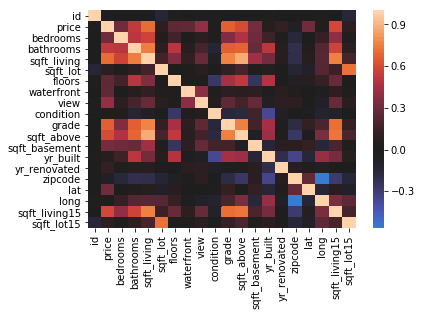

In [574]:
sns.heatmap(df.corr(), center=0);

In [575]:
# dropping the 'grade' column because it shows some multicolinearity with variables that already seem to correlate 
# strongly with our dependent variable 'price'
df_features = df_features.drop(['grade'], axis=1)
df_features = df_features.drop(['zipcode'], axis=1)
df_features = df_features.drop(['yr_renovated'], axis=1)
df_features = df_features.drop(['yr_built'], axis=1)
df_features = df_features.drop(['lat'], axis=1)
df_features = df_features.drop(['long'], axis=1)

# Step 3: DATA EXPLORATION TIME!

### Continuous Data vs Price

In [576]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21082 entries, 0 to 21596
Data columns (total 12 columns):
bedrooms         21082 non-null int64
bathrooms        21082 non-null float64
sqft_living      21082 non-null int64
sqft_lot         21082 non-null int64
floors           21082 non-null float64
waterfront       21082 non-null float64
view             21082 non-null float64
condition        21082 non-null int64
sqft_above       21082 non-null int64
sqft_basement    21082 non-null float64
sqft_living15    21082 non-null int64
sqft_lot15       21082 non-null int64
dtypes: float64(5), int64(7)
memory usage: 2.1 MB


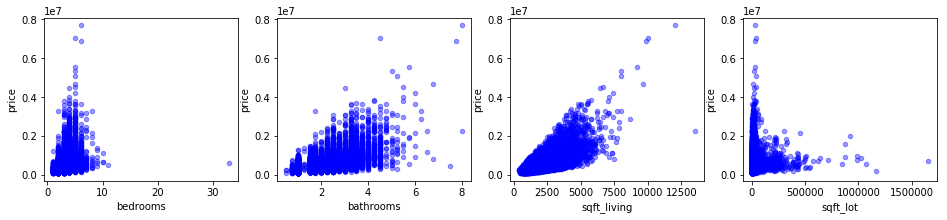

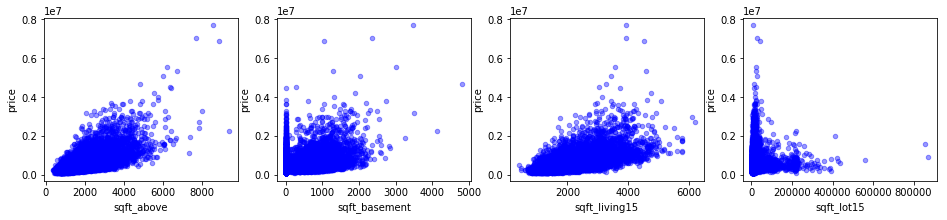

In [579]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(list(df_features)[0:4], axes):
    df.plot(kind='scatter', x= xcol, y="price", ax=ax, alpha=0.4, color='b')
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(list(df_features)[8:], axes):
    df.plot(kind='scatter', x= xcol, y="price", ax=ax, alpha=0.4, color='b')
plt.show()

### Categorical data vs Price

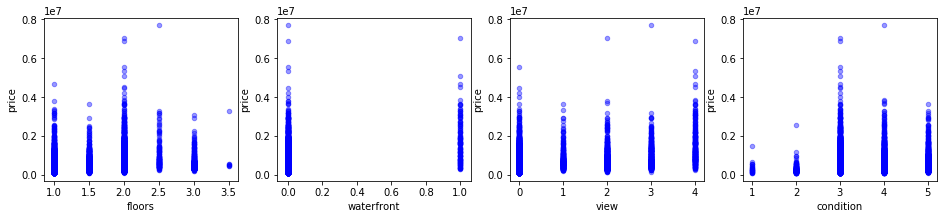

In [580]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(list(df_features)[4:8], axes):
    df.plot(kind='scatter', x= xcol, y="price", ax=ax, alpha=0.4, color='b')
plt.show()

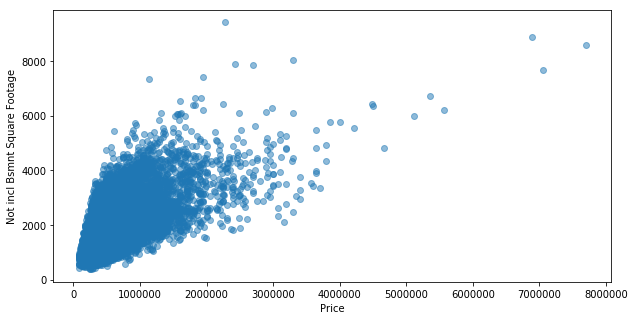

In [581]:
# Examining the positive correlation
plt.figure(figsize=(10, 5))
plt.scatter(df["price"], df["sqft_above"], alpha=0.5)
plt.xlabel("Price")
plt.ylabel("Not incl Bsmnt Square Footage")
plt.show()

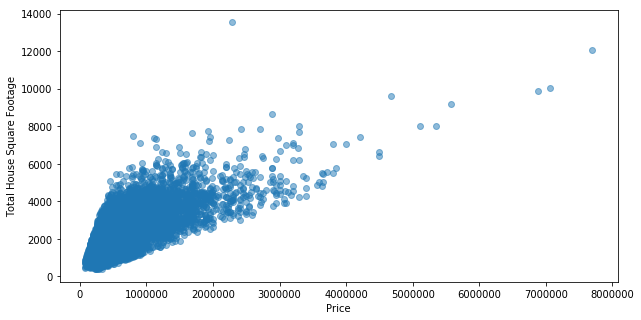

In [582]:
# Examining the positive correlation
plt.figure(figsize=(10, 5))
plt.scatter(df["price"], df["sqft_living"], alpha=0.5)
plt.xlabel("Price")
plt.ylabel("Total House Square Footage")
plt.show()


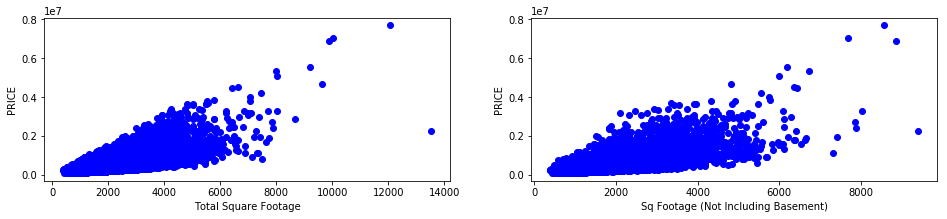

In [583]:
new_figure = plt.figure(figsize=(16,3))

ax = new_figure.add_subplot(121)
ax2 = new_figure.add_subplot(122)

ax.scatter(x = df.sqft_living, y=df.price, color='blue')
ax2.scatter(x= df.sqft_above, y=df.price, color='blue')

ax.set_xlabel('Total Square Footage')
ax.set_ylabel('PRICE')


ax2.set_xlabel('Sq Footage (Not Including Basement)')
ax2.set_ylabel('PRICE')


plt.show()


### Makes sense that these two independent variables would mirror each other as total square footage of a house is a direct function of total square footage not including the house's basement

# Binning the categorical variables:

In [584]:
bins = [0, 2, 3, 4, 34]

bins_beds = pd.cut(df_features['bedrooms'], bins)
bins_beds = bins_beds.cat.as_unordered()

In [585]:
bins = [0, 1, 2, 3, 9]

bins_baths = pd.cut(df_features['bathrooms'], bins)
bins_baths = bins_baths.cat.as_unordered()

In [586]:
bins = [0, 1, 2, 4]

bins_floors = pd.cut(df_features['floors'], bins)
bins_floors = bins_floors.cat.as_unordered()

In [587]:
bins = [0, 2, 4]

bins_view = pd.cut(df_features['view'], bins)
bins_view = bins_view.cat.as_unordered()

In [588]:
bins = [0, 2, 3, 4, 5]

bins_condition = pd.cut(df_features['condition'], bins)
bins_condition = bins_condition.cat.as_unordered()

In [589]:
beds_dummy = pd.get_dummies(bins_beds, prefix="BED", drop_first=True)
baths_dummy = pd.get_dummies(bins_baths, prefix="BATH", drop_first=True)
floors_dummy = pd.get_dummies(bins_floors, prefix="FLRS", drop_first=True)
view_dummy = pd.get_dummies(bins_view, prefix="VIEW", drop_first=True)
waterfront_dummy = pd.get_dummies(df_features.waterfront, prefix="WFT", drop_first=True)
condition_dummy = pd.get_dummies(bins_condition, prefix="CDTN", drop_first=True)

In [603]:
df_cont = df_features.drop(['bedrooms'], axis=1)
df_cont = df_cont.drop(['bathrooms'], axis=1)
df_cont = df_cont.drop(['floors'], axis=1)
df_cont = df_cont.drop(['waterfront'], axis=1)
df_cont = df_cont.drop(['view'], axis=1)
df_cont = df_cont.drop(['condition'], axis=1)
df_features_final =  pd.concat([df_cont, beds_dummy, baths_dummy, floors_dummy, view_dummy, waterfront_dummy, condition_dummy], axis=1) 
df_cat = pd.concat([beds_dummy, baths_dummy, floors_dummy, view_dummy, waterfront_dummy, condition_dummy], axis=1) 
df_final = pd.concat([df.price, df_features_final], axis=1)

In [604]:
df_final.head()

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15,"BED_(2, 3]","BED_(3, 4]","BED_(4, 34]","BATH_(1, 2]","BATH_(2, 3]","BATH_(3, 9]","FLRS_(1, 2]","FLRS_(2, 4]","VIEW_(2, 4]",WFT_1.0,"CDTN_(2, 3]","CDTN_(3, 4]","CDTN_(4, 5]"
0,221900.0,1180,5650,1180,0.0,1340,5650,1,0,0,0,0,0,0,0,0,0,1,0,0
1,538000.0,2570,7242,2170,400.0,1690,7639,1,0,0,0,1,0,1,0,0,0,1,0,0
2,180000.0,770,10000,770,0.0,2720,8062,0,0,0,0,0,0,0,0,0,0,1,0,0
3,604000.0,1960,5000,1050,910.0,1360,5000,0,1,0,0,1,0,0,0,0,0,0,0,1
4,510000.0,1680,8080,1680,0.0,1800,7503,1,0,0,1,0,0,0,0,0,0,1,0,0


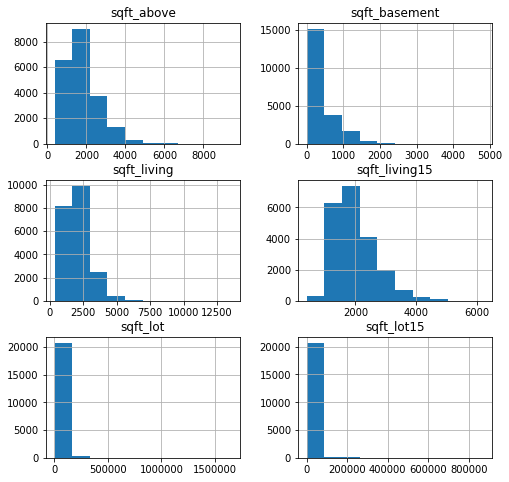

In [605]:
df_cont.hist(figsize  = [8, 8]);

## Log transformation to make the data more "normal"

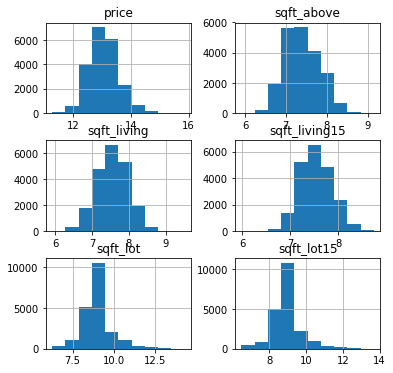

In [611]:
data_log= pd.DataFrame([])
data_log["price"] = np.log(df_final["price"])
data_log["sqft_living"] = np.log(df_cont["sqft_living"])
data_log["sqft_above"] = np.log(df_cont["sqft_above"])
data_log["sqft_lot"] = np.log(df_cont["sqft_lot"])
data_log["sqft_living15"] = np.log(df_cont["sqft_living15"])
data_log["sqft_lot15"] = np.log(df_cont["sqft_lot15"])
data_log.hist(figsize  = [6, 6]);

In [612]:
df_logfinal =  pd.concat([data_log, df_cont.sqft_basement, df_cat], axis=1) 

In [613]:
df_logfinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21082 entries, 0 to 21596
Data columns (total 20 columns):
price            21082 non-null float64
sqft_living      21082 non-null float64
sqft_above       21082 non-null float64
sqft_lot         21082 non-null float64
sqft_living15    21082 non-null float64
sqft_lot15       21082 non-null float64
sqft_basement    21082 non-null float64
BED_(2, 3]       21082 non-null uint8
BED_(3, 4]       21082 non-null uint8
BED_(4, 34]      21082 non-null uint8
BATH_(1, 2]      21082 non-null uint8
BATH_(2, 3]      21082 non-null uint8
BATH_(3, 9]      21082 non-null uint8
FLRS_(1, 2]      21082 non-null uint8
FLRS_(2, 4]      21082 non-null uint8
VIEW_(2, 4]      21082 non-null uint8
WFT_1.0          21082 non-null uint8
CDTN_(2, 3]      21082 non-null uint8
CDTN_(3, 4]      21082 non-null uint8
CDTN_(4, 5]      21082 non-null uint8
dtypes: float64(7), uint8(13)
memory usage: 1.5 MB


In [614]:
df_logfinal.to_csv("kc_dataset_cleaned.csv", index=False)

#### Utilizing normalized histograms with kernel density estimate plots to explore the distributions of continuous variables further.

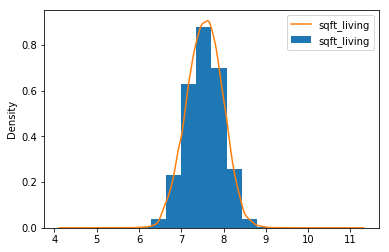

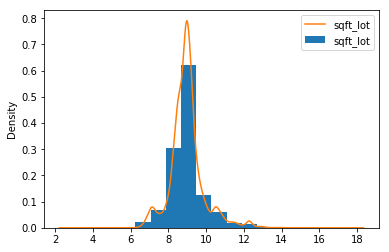

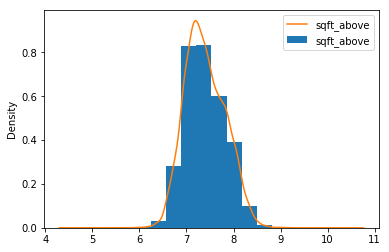

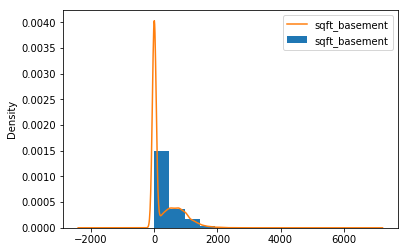

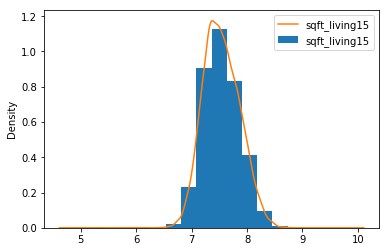

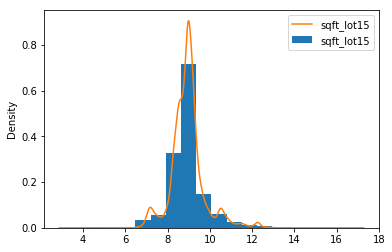

In [617]:
for column in ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']:
    df_logfinal[column].plot.hist(normed=True )
    df_logfinal[column].plot.kde(label=column )
    plt.legend()
    plt.show()

### Utilizing joint plots to check for the linearity assumption between predictors and target variable

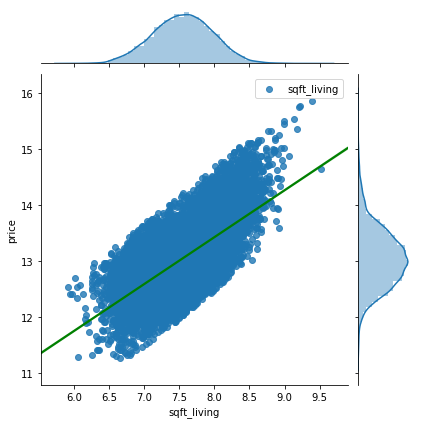

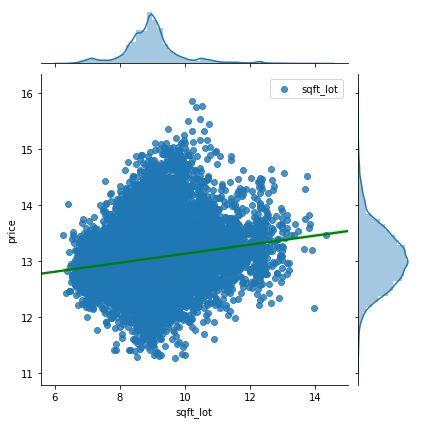

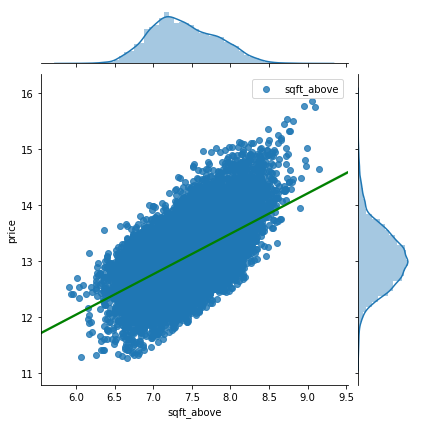

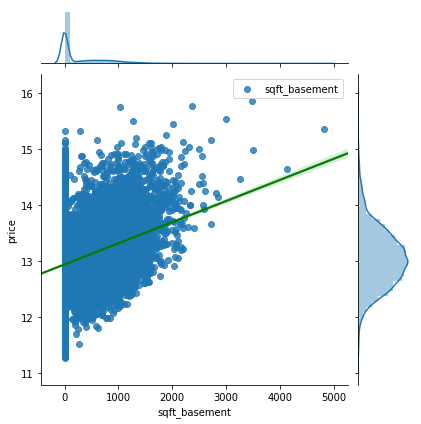

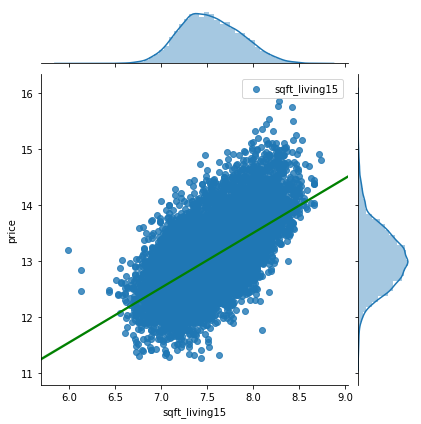

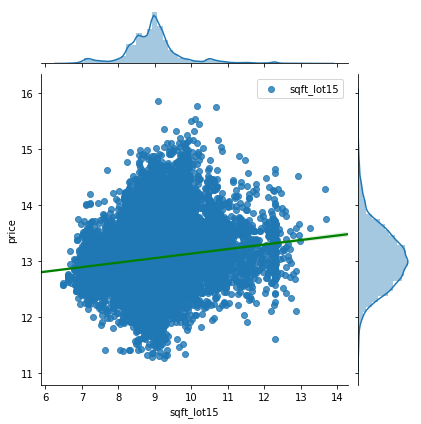

In [618]:
for column in ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']:
    sns.jointplot(x=column, y="price",
                  data=df_logfinal, 
                  kind='reg', 
                  label=column,
                  joint_kws={'line_kws':{'color':'green'}})
    plt.legend()
    plt.show()

# Step 4: MODEL TIME

In [620]:
for cat_names in df_logfinal.iloc[:,7:].columns:
         df_logfinal[cat_names] = df_logfinal[cat_names].astype('category')

In [621]:
df_logfinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21082 entries, 0 to 21596
Data columns (total 20 columns):
price            21082 non-null float64
sqft_living      21082 non-null float64
sqft_above       21082 non-null float64
sqft_lot         21082 non-null float64
sqft_living15    21082 non-null float64
sqft_lot15       21082 non-null float64
sqft_basement    21082 non-null float64
BED_(2, 3]       21082 non-null category
BED_(3, 4]       21082 non-null category
BED_(4, 34]      21082 non-null category
BATH_(1, 2]      21082 non-null category
BATH_(2, 3]      21082 non-null category
BATH_(3, 9]      21082 non-null category
FLRS_(1, 2]      21082 non-null category
FLRS_(2, 4]      21082 non-null category
VIEW_(2, 4]      21082 non-null category
WFT_1.0          21082 non-null category
CDTN_(2, 3]      21082 non-null category
CDTN_(3, 4]      21082 non-null category
CDTN_(4, 5]      21082 non-null category
dtypes: category(13), float64(7)
memory usage: 1.5 MB


In [622]:
col_names = df_logfinal.describe().columns.drop(['price'])
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for idx, val in enumerate(col_names):
    print ("Price~" + val)
    print ("------------------------------")

    f = 'price~' + val
    model = smf.ols(formula=f, data=df_logfinal).fit()
    X_new = pd.DataFrame({val: [df_logfinal[val].min(), df_logfinal[val].max()]});
    preds = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1]])
    print (results[idx+1])

Price~sqft_living
------------------------------
['sqft_living', 0.45487390817074225, 6.725492042621472, 0.8373565737137357, 0.0]
Price~sqft_above
------------------------------
['sqft_above', 0.34318242539406996, 7.707525685549353, 0.7221650180792579, 0.0]
Price~sqft_lot
------------------------------
['sqft_lot', 0.01912643850674456, 12.32211855226208, 0.08076135917588545, 1.5829053476127593e-90]
Price~sqft_living15
------------------------------
['sqft_living15', 0.36916437948169, 5.68335234919347, 0.97681892342578, 0.0]
Price~sqft_lot15
------------------------------
['sqft_lot15', 0.015423788005503813, 12.325902579830249, 0.0806025670042847, 3.109059505523095e-73]
Price~sqft_basement
------------------------------
['sqft_basement', 0.10000467070713126, 12.93848791056223, 0.00037660908981161195, 0.0]


In [623]:
# drop continuous variables which resulted in single linear models with a R-squared value <0.01
pd.DataFrame(results)

,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p-value
1,sqft_living,0.454874,6.72549,0.837357,0
2,sqft_above,0.343182,7.70753,0.722165,0
3,sqft_lot,0.0191264,12.3221,0.0807614,1.58291e-90
4,sqft_living15,0.369164,5.68335,0.976819,0
5,sqft_lot15,0.0154238,12.3259,0.0806026,3.10906e-73
6,sqft_basement,0.100005,12.9385,0.000376609,0


In [647]:
cols_bed = df_logfinal.columns[8:10]
cols_bath = df_logfinal.columns[11:13]
cols_flrs = df_logfinal.columns[14:15]
cols_cdtn = df_logfinal.columns[18:] 

cols = [cols_bed, cols_bath , cols_flrs, cols_cdtn]
for col in cols:
    sum_cols = "+".join(col)
    form = "price ~" + sum_cols
    model = smf.ols(formula= form, data= df_logfinal).fit()
    print(model.summary())

SyntaxError: invalid syntax (<unknown>, line 1)

In [624]:
df_logfinal.head()

,price,sqft_living,sqft_above,sqft_lot,sqft_living15,sqft_lot15,sqft_basement,"BED_(2, 3]","BED_(3, 4]","BED_(4, 34]","BATH_(1, 2]","BATH_(2, 3]","BATH_(3, 9]","FLRS_(1, 2]","FLRS_(2, 4]","VIEW_(2, 4]",WFT_1.0,"CDTN_(2, 3]","CDTN_(3, 4]","CDTN_(4, 5]"
0,12.309982,7.073270,7.073270,8.639411,7.200425,8.639411,0.0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,13.195614,7.851661,7.682482,8.887653,7.432484,8.941022,400.0,1,0,0,0,1,0,1,0,0,0,1,0,0
2,12.100712,6.646391,6.646391,9.210340,7.908387,8.994917,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,13.311329,7.580700,6.956545,8.517193,7.215240,8.517193,910.0,0,1,0,0,1,0,0,0,0,0,0,0,1
4,13.142166,7.426549,7.426549,8.997147,7.495542,8.923058,0.0,1,0,0,1,0,0,0,0,0,0,1,0,0


In [632]:
y = df_logfinal[["price"]]
X = df_logfinal.drop(["price"], axis=1)

In [633]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()


In [634]:
r_list = []
adj_r_list = []
list_n = list(range(5,86,10))
for n in list_n: 
    select_n = RFE(linreg, n_features_to_select = n)
    select_n = select_n.fit(X, np.ravel(y))
    selected_columns = X.columns[select_n.support_ ]
    linreg.fit(X[selected_columns],y)
    yhat = linreg.predict(X[selected_columns])
    SS_Residual = np.sum((y-yhat)**2)
    SS_Total = np.sum((y-np.mean(y))**2)
    r_squared = 1 - (float(SS_Residual))/SS_Total
    print(r_squared)
    adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
    print(adjusted_r_squared)
r_list.append(r_squared)
adj_r_list.append(adjusted_r_squared)

price    0.512005
dtype: float64
price    0.511565
dtype: float64
price    0.562725
dtype: float64
price    0.562331
dtype: float64
price    0.565164
dtype: float64
price    0.564772
dtype: float64
price    0.565164
dtype: float64
price    0.564772
dtype: float64
price    0.565164
dtype: float64
price    0.564772
dtype: float64
price    0.565164
dtype: float64
price    0.564772
dtype: float64
price    0.565164
dtype: float64
price    0.564772
dtype: float64
price    0.565164
dtype: float64
price    0.564772
dtype: float64
price    0.565164
dtype: float64
price    0.564772
dtype: float64


In [648]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=3)

MSE_test = []
MSE_train = []
list_n = list(range(5,25,5))
for n in list_n: 
    select_n = RFE(linreg, n_features_to_select = n)
    select_n = select_n.fit(X_train, np.ravel(y_train))
    selected_columns = X.columns[select_n.support_ ]
    linreg.fit(X_train[selected_columns],y_train)
    yhat_train = linreg.predict(X_train[selected_columns])
    yhat_test = linreg.predict(X_test[selected_columns])
    mse_train = np.sum((y_train-yhat_train)**2)/len(y_train)
    mse_test =np.sum((y_test-yhat_test)**2)/len(y_test)
    print(mse_train)
    print(mse_test)
MSE_test.append(mse_test)
MSE_train.append(mse_train)

price    0.134377
dtype: float64
price    0.138779
dtype: float64
price    0.127912
dtype: float64
price    0.131497
dtype: float64
price    0.120458
dtype: float64
price    0.124192
dtype: float64
price    0.119835
dtype: float64
price    0.123347
dtype: float64


In [636]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score


select_85 = RFE(linreg, n_features_to_select = 85)
select_85 = select_n.fit(X, np.ravel(y))
selected_columns = X.columns[select_n.support_]

cv_10_results = cross_val_score(linreg, X[selected_columns], y, cv=10, scoring="neg_mean_squared_error")

cv_10_results

array([-0.11700204, -0.12917673, -0.1202766 , -0.12295396, -0.11890179,
       -0.11962282, -0.12319467, -0.12296337, -0.12189475, -0.11708797])